In [74]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')

In [75]:
df=pd.read_csv(r"C:\Users\GCE PMNA\Documents\Shadil\Lung Cancer\survey lung cancer.csv")
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [76]:
df.shape

(309, 16)

In [77]:
df.columns


Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [79]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634
std,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588
min,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000
75%,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [80]:
df.describe(include='object')

,GENDER,LUNG_CANCER
count,309,309
unique,2,2
top,M,YES
freq,162,270


In [81]:
df.isna().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [82]:
num_col=(df.select_dtypes('number'))
num_col

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2


In [83]:
datadict=pd.DataFrame(df.dtypes)
datadict['MissingVal'] =df.isnull().sum()
datadict['NUnique']=df.nunique()
datadict['Count']=df.count()
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
GENDER,object,0,2,309
AGE,int64,0,39,309
SMOKING,int64,0,2,309
YELLOW_FINGERS,int64,0,2,309
ANXIETY,int64,0,2,309
PEER_PRESSURE,int64,0,2,309
CHRONIC DISEASE,int64,0,2,309
FATIGUE,int64,0,2,309
ALLERGY,int64,0,2,309
WHEEZING,int64,0,2,309


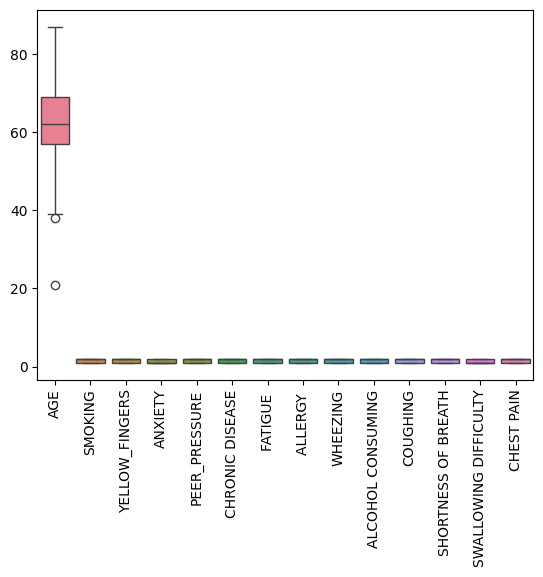

In [84]:
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

<Axes: ylabel='AGE'>

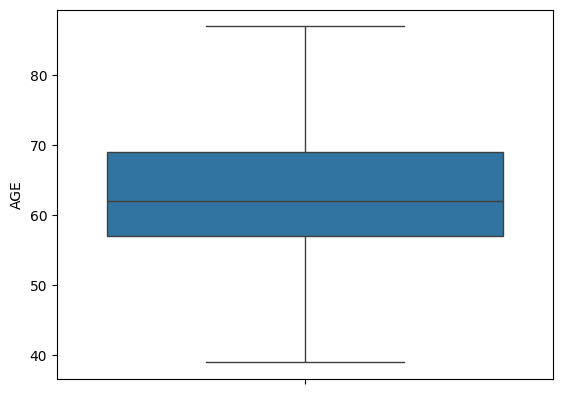

In [85]:
Q1=df['AGE'].quantile(.25)
Q3=df['AGE'].quantile(.75)
IQR=Q3-Q1
l_limit=Q1-1.5*IQR
u_limit=Q3+1.5*IQR
df['AGE']=df['AGE'].clip(l_limit,u_limit)
sns.boxplot(data=df['AGE'])

<Axes: xlabel='AGE', ylabel='Density'>

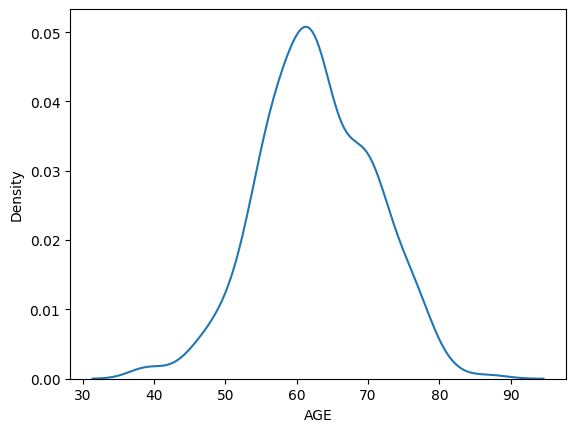

In [86]:
sns.kdeplot(data=df['AGE'])

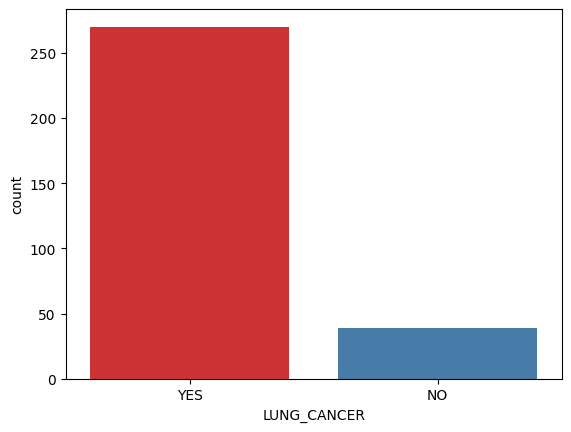

In [87]:
sns.countplot(data=df,x='LUNG_CANCER',palette='Set1')
plt.show()

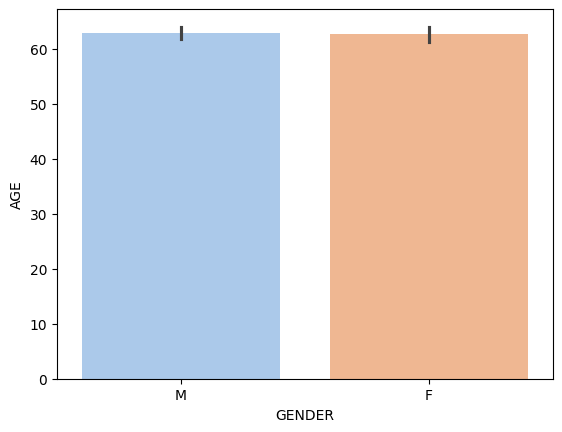

In [88]:
sns.barplot(data=df, x='GENDER', y='AGE', palette='pastel')
plt.show()

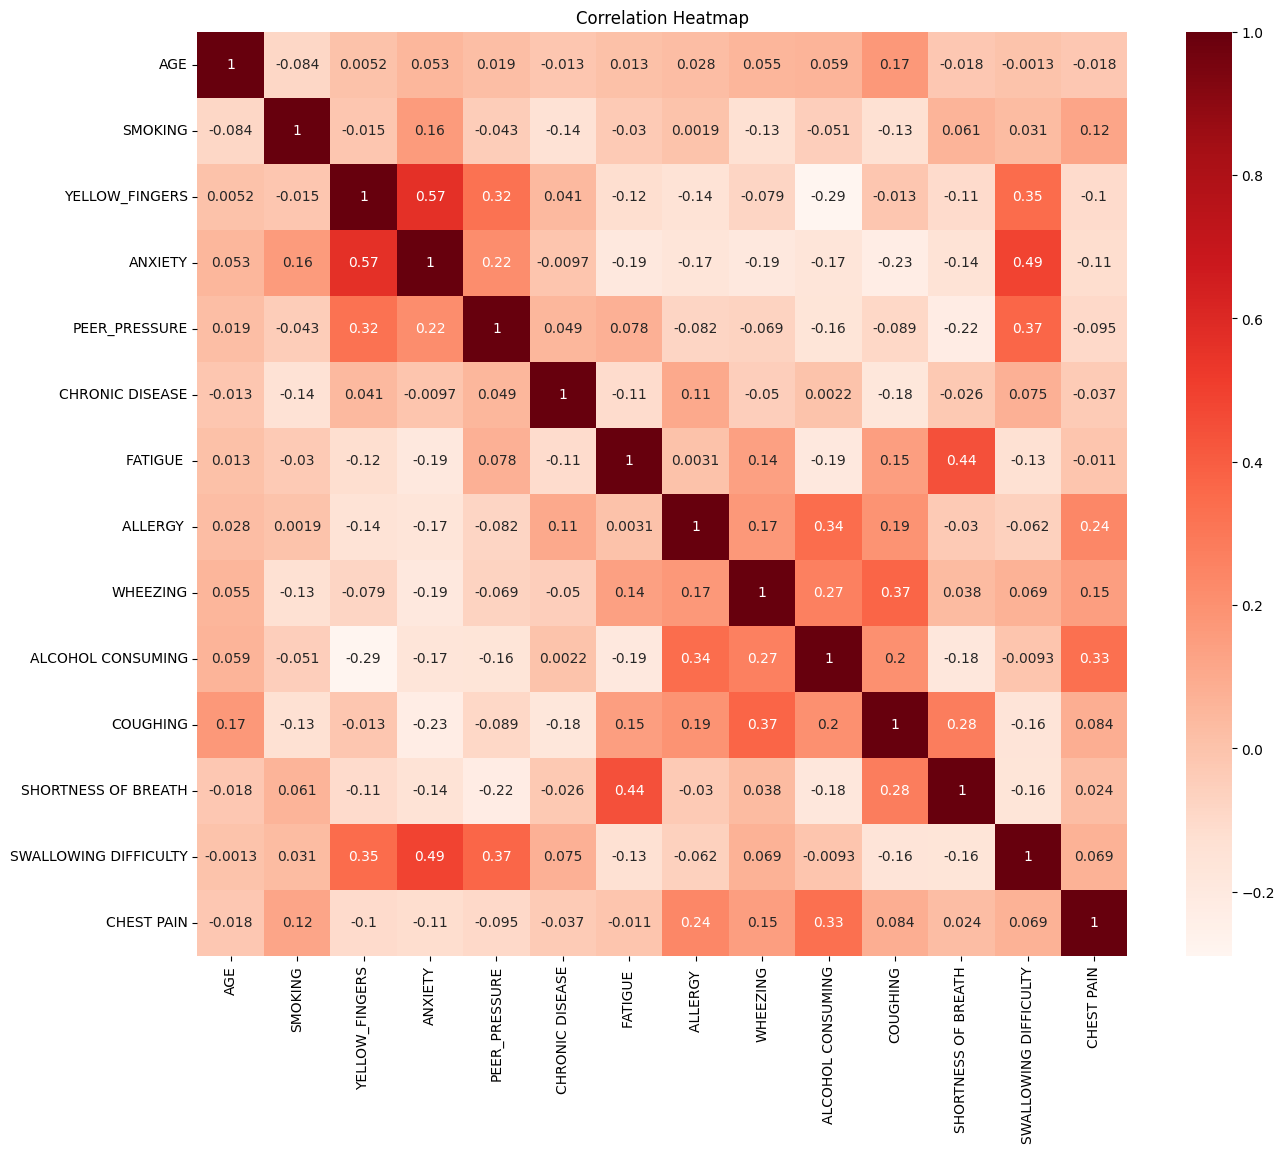

In [89]:
plt.figure(figsize=(15,12))
sns.heatmap(num_col.corr(), annot=True,cmap='Reds')
plt.title("Correlation Heatmap")
plt.show()

In [90]:
datadict

,DataType,MissingVal,NUnique,Count
GENDER,object,0,2,309
AGE,int64,0,39,309
SMOKING,int64,0,2,309
YELLOW_FINGERS,int64,0,2,309
ANXIETY,int64,0,2,309
PEER_PRESSURE,int64,0,2,309
CHRONIC DISEASE,int64,0,2,309
FATIGUE,int64,0,2,309
ALLERGY,int64,0,2,309
WHEEZING,int64,0,2,309


In [91]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['LUNG_CANCER']=le.fit_transform(df['LUNG_CANCER'])

In [92]:
df= pd.get_dummies(df, columns=['GENDER'])

In [93]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1,False,True
1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1,False,True
2,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0,True,False
3,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0,False,True
4,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1,True,False
305,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1,False,True
306,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1,False,True
307,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1,False,True


In [94]:
df.columns

Index(['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER', 'GENDER_F',
       'GENDER_M'],
      dtype='object')

In [95]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cols=['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_F',
       'GENDER_M']
for i in cols:
    df[i]=sc.fit_transform(df[[i]])


In [96]:
sd=sc.fit_transform(df[cols])
#sd

In [97]:
df[['AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY', 'PEER_PRESSURE',
       'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'GENDER_F',
       'GENDER_M']]=pd.DataFrame(sd,columns=cols)

In [98]:
df

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER,GENDER_F,GENDER_M
0,0.787963,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,1,-0.952579,0.952579
1,1.416786,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,1,-0.952579,0.952579
2,-0.469684,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,0,1.049781,-1.049781
3,0.033374,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,0,-0.952579,0.952579
4,0.033374,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,0,1.049781,-1.049781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.846978,-1.135292,-1.150351,-0.996769,0.996769,0.990338,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480,1,1.049781,-1.049781
305,0.913727,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475,1,-0.952579,0.952579
306,-0.595449,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475,1,-0.952579,0.952579
307,0.536433,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475,1,-0.952579,0.952579


In [ ]:
x=df.drop('LUNG_CANCER',axis=1)
x

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,GENDER_F,GENDER_M
0,0.787963,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,-0.952579,0.952579
1,1.416786,0.880830,-1.150351,-0.996769,-1.003241,0.990338,0.696833,0.892475,-1.120480,-1.120480,-1.173424,0.748736,1.063501,0.892475,-0.952579,0.952579
2,-0.469684,-1.135292,-1.150351,-0.996769,0.996769,-1.009756,0.696833,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,0.892475,1.049781,-1.049781
3,0.033374,0.880830,0.869300,1.003241,-1.003241,-1.009756,-1.435063,-1.120480,-1.120480,0.892475,-1.173424,-1.335584,1.063501,0.892475,-0.952579,0.952579
4,0.033374,-1.135292,0.869300,-0.996769,-1.003241,-1.009756,-1.435063,-1.120480,0.892475,-1.120480,0.852207,0.748736,-0.940291,-1.120480,1.049781,-1.049781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,-0.846978,-1.135292,-1.150351,-0.996769,0.996769,0.990338,0.696833,-1.120480,-1.120480,0.892475,0.852207,0.748736,1.063501,-1.120480,1.049781,-1.049781
305,0.913727,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,0.696833,0.892475,0.892475,0.892475,0.852207,0.748736,-0.940291,0.892475,-0.952579,0.952579
306,-0.595449,0.880830,-1.150351,-0.996769,-1.003241,-1.009756,-1.435063,0.892475,0.892475,0.892475,0.852207,-1.335584,-0.940291,0.892475,-0.952579,0.952579
307,0.536433,0.880830,-1.150351,1.003241,-1.003241,-1.009756,0.696833,0.892475,-1.120480,0.892475,0.852207,0.748736,-0.940291,0.892475,-0.952579,0.952579


In [100]:
y=df['LUNG_CANCER']
y

0      1
1      1
2      0
3      0
4      0
      ..
304    1
305    1
306    1
307    1
308    1
Name: LUNG_CANCER, Length: 309, dtype: int64

In [101]:
from sklearn.model_selection import train_test_split


In [102]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [103]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [104]:
model=model.fit(x_train,y_train)

In [105]:
y_pred=model.predict(x_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1])

In [106]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9743589743589743

In [107]:
new_data=[[0.787963,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,-0.952579,0.952579]]

In [108]:
prediction =model.predict(new_data)
prediction

array([1])

In [109]:
from sklearn.ensemble import RandomForestClassifier
model2=RandomForestClassifier(n_estimators=100, random_state=42)

In [110]:
model2=model2.fit(x_train,y_train)

In [111]:
y_pred2=model2.predict(x_test)

In [112]:
y_pred2

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1])

In [113]:
from sklearn.metrics import accuracy_score
accuracy2=accuracy_score(y_test,y_pred)
accuracy2

0.9743589743589743

In [114]:
new_data1=[[0.787963,-1.135292,0.869300,1.003241,-1.003241,-1.009756,0.696833,-1.120480,0.892475,0.892475,0.852207,0.748736,1.063501,0.892475,-0.952579,0.952579]]

In [115]:
prediction2 =model2.predict(new_data1)
prediction2

array([1])

In [116]:
from sklearn.tree import DecisionTreeClassifier
model_dt= DecisionTreeClassifier(criterion='gini',random_state=42)

In [117]:
model_dt=model_dt.fit(x_train,y_train)
y_pred_dt=model_dt.predict(x_test)
print(y_pred_dt)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 0
 0 0 1 1]


In [118]:
from sklearn.metrics import accuracy_score
r2_dt=accuracy_score(y_test,y_pred_dt)
r2_dt

0.9487179487179487

In [119]:
prediction_dt=model_dt.predict(new_data)

In [120]:
prediction_dt

array([1])

In [121]:
from sklearn.svm import SVC
svc_lin=SVC(kernel='linear')

In [122]:
svc_lin.fit(x_train,y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [123]:
y_lin=svc_lin.predict(x_test)

In [124]:
accuracy_lin=accuracy_score(y_test,y_lin)

In [125]:
accuracy_lin

0.9743589743589743

In [126]:
svc_rbf=SVC(kernel="rbf")
svc_rbf.fit(x_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [127]:
y_rbf=svc_rbf.predict(x_test)

In [128]:
accuracy_rbf=accuracy_score(y_test,y_rbf)
accuracy_rbf

0.9615384615384616

In [129]:
from sklearn.neighbors import KNeighborsClassifier

In [130]:
metric_k=[]
neighbours=range(3,15)

In [131]:
for i in neighbours:
    knn=KNeighborsClassifier(n_neighbors=i,metric="euclidean")
    knn.fit(x_train,y_train)
    y_preds=knn.predict(x_test)
    acc=accuracy_score(y_test,y_preds)
    metric_k.append(acc)

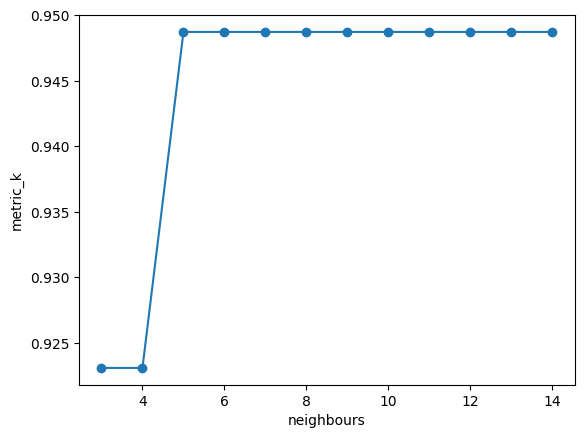

In [132]:
plt.plot(neighbours,metric_k,'o-')
plt.xlabel("neighbours")
plt.ylabel("metric_k")
plt.show()

In [133]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(x_train,y_train)
y_predk=knn.predict(x_test)
acc_k=accuracy_score(y_test,y_predk)

In [134]:
acc_k

0.9487179487179487

In [135]:
from xgboost import XGBClassifier
xgb_model=XGBClassifier()

In [136]:
xgb_model.fit(x_train,y_train)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [137]:
y_xgb=xgb_model.predict(x_test)
acc_xgb=accuracy_score(y_test,y_xgb)
acc_xgb

0.9871794871794872

In [138]:
from catboost import CatBoostClassifier
cat_model=CatBoostClassifier()

In [139]:
cat_model.fit(x_train,y_train)
y_cat=cat_model.predict(x_test)

Learning rate set to 0.005511
0:	learn: 0.6887466	total: 7.03ms	remaining: 7.03s
1:	learn: 0.6824062	total: 9.87ms	remaining: 4.92s
2:	learn: 0.6782372	total: 14.2ms	remaining: 4.73s
3:	learn: 0.6726296	total: 17.7ms	remaining: 4.41s
4:	learn: 0.6670721	total: 28.1ms	remaining: 5.6s
5:	learn: 0.6618919	total: 31.2ms	remaining: 5.17s
6:	learn: 0.6565377	total: 34.6ms	remaining: 4.9s
7:	learn: 0.6517625	total: 37.6ms	remaining: 4.66s
8:	learn: 0.6466736	total: 40.4ms	remaining: 4.45s
9:	learn: 0.6422490	total: 42.7ms	remaining: 4.23s
10:	learn: 0.6375376	total: 45.6ms	remaining: 4.1s
11:	learn: 0.6328478	total: 50ms	remaining: 4.12s
12:	learn: 0.6278429	total: 52.9ms	remaining: 4.01s
13:	learn: 0.6226449	total: 55.6ms	remaining: 3.92s
14:	learn: 0.6181510	total: 58.3ms	remaining: 3.83s
15:	learn: 0.6132090	total: 60.9ms	remaining: 3.75s
16:	learn: 0.6086602	total: 64.4ms	remaining: 3.72s
17:	learn: 0.6045784	total: 67.1ms	remaining: 3.66s
18:	learn: 0.6010004	total: 69.8ms	remaining: 3.6

In [140]:
acc_cat=accuracy_score(y_test,y_cat)
acc_cat

0.9743589743589743

In [145]:
import lightgbm as lgb
lgb_model=lgb.LGBMClassifier()

In [146]:
lgb_model.fit(x_train,y_train)
y_lgb=lgb_model.predict(x_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 197, number of negative: 34
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 75
[LightGBM] [Info] Number of data points in the train set: 231, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.852814 -> initscore=1.756843
[LightGBM] [Info] Start training from score 1.756843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

In [147]:
acc_lgb=accuracy_score(y_test,y_lgb)
acc_lgb

0.9615384615384616